<h1 style="text-align: center;"><center>Master&nbsp;in&nbsp;Interdisciplinary&nbsp;and&nbsp;Innovation&nbsp;Engineering Computer&nbsp;Vision</center></h1>
<h2 style="text-align: center;"><center><strong>Convolutional Neural Networks - Final Work</strong></center></h2>
<hr />
<p style="text-align: center;"><center><br />Departament de Matem&agrave;tiques (DMAT)<br />Escola d&rsquo;Enginyeria de Barcelona Est (EEBE)<br />Universitat Polit&egrave;cnica de Catalunya (UPC)<br />2023</center></p>



---




<h1> Final work </h1>
<h2> by Nicolai Olsen and Emil Kousgard </h2>

**Leukocytes** have a crucial role in the immune system. They help defend the body against infection and disease by identifying and attacking foreign substances such as bacteria, viruses, and other pathogens. There are five main types of leukocytes, each with distinct functions and characteristics:

-  lymphocytes
-  monocytes
-  basophils
-  eosinophils
-  neutrophils

Accurately identifying and classifying these leukocytes can be important in diagnosing and treating various diseases and conditions. For example, a high **neutrophil** count may be a sign of a bacterial infection, while a high **eosinophil** count may indicate an allergic reaction or parasitic infection.


<strong><font color=#ff0000>Instructions for the work:</font></strong>

In this final work, you will create a **Convolutional Neural Network (CNN)**  to classify the five main types of leukocytes.

1. Execute the code in sequential order. Write code when asked and solve the questions.
2. The dataset required is in the **dataset_leukocytes** folder in Atenea. Take some time to explore the images and familiarize with the type of cells.
3. The notebook can be executed in colab. Select a hardware accelerator like a **GPU** in colab to increase the speed of training phase.

---
# 1. Data set
---

EXECUTE THIS CODE TO LOAD LIBRARIES AND DATASET:

In [ ]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from pathlib import Path
from google.colab import drive


# Set up location
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

path = Path('/content/drive/MyDrive/UPC/Semester2/Computer Vision/Final Work/Database/dataset_leukocytes') # change depending on the location of the database
folders = os.listdir(path)
data_f = []
for folder in folders:
    folder_path = os.path.join(path, folder)
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        data_f.append((img_path, folder))

# Dataframe
df = pd.DataFrame(data_f, columns=['image_path', 'label'])


training_data, test_df = train_test_split(df, test_size= 0.20, random_state= 42, stratify= df['label'])
train_df, val_df = train_test_split(training_data, test_size= 0.50, random_state= 42, stratify= training_data['label'])
train_df['set']='train_set'
val_df['set']='val_set'
test_df['set']='test_set'
df = pd.concat([train_df, val_df, test_df], ignore_index=True, sort=False)
df.head()

,image_path,label,set
0,/content/drive/MyDrive/UPC/Semester2/Computer ...,neutrophil,train_set
1,/content/drive/MyDrive/UPC/Semester2/Computer ...,lymphocyte,train_set
2,/content/drive/MyDrive/UPC/Semester2/Computer ...,neutrophil,train_set
3,/content/drive/MyDrive/UPC/Semester2/Computer ...,basophil,train_set
4,/content/drive/MyDrive/UPC/Semester2/Computer ...,monocyte,train_set


<strong><font color=#ff0000>Question 1 (1 pt):</font></strong>

<strong><font color=#ff0000>What is the purpose of the library "from sklearn.model_selection import train_test_split"?</font></strong>

The purpose of sklearn.model_selection.train_test_split is to easily split your data into a train and test set. There are different parameters to choose, defining the ratio of training data to test data, whether or not to use a controlled random_state for reproducability, shuffling data, and wether or not to stratify the data with given class-labels.








<strong><font color=#ff0000>Question 2 (1 pt):</font></strong>

<strong><font color=#ff0000>What percentage of the total dataset is allocated to the train set, validation set, and test set?</font></strong>

Train: 40%
Test: 20%
Validation: 40%






---
# 2. Load and process the data
---

EXECUTE THIS CODE TO SET UP PARAMETERS

neutrophil    500
lymphocyte    500
basophil      500
monocyte      500
eosinophil    500
Name: label, dtype: int64

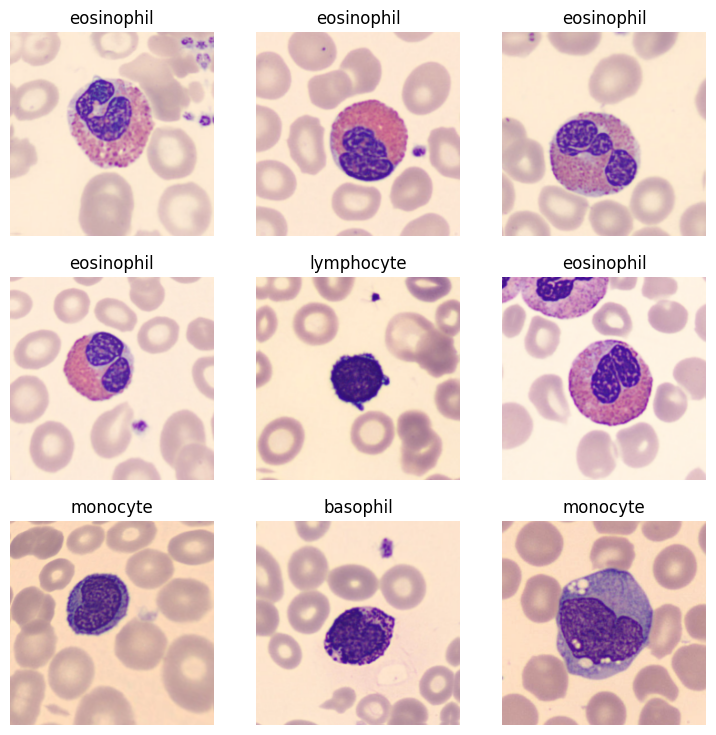

In [ ]:
from fastai.vision.all import *
batch_size = 32
train_idx = list(train_df.index)
val_idx = list(val_df.index)
data = ImageDataLoaders.from_df(df,
                                path="/",
                                cols="image_path",
                                item_tfms=Resize(224),
                                batch_tfms=[*aug_transforms(),
                                            Normalize.from_stats(*imagenet_stats)],
                                bs=batch_size,
                                train_idx=train_idx,
                                valid_idx=val_idx)

data.show_batch()
df.label.value_counts()

<strong><font color=#ff0000>Question 3 (1 pt):</font></strong>

<strong><font color=#ff0000>Do some research and explain with your own words what are the fastai ImageDataLoader and what are they used for?</font></strong>

The fastai ImageDataLoader is a data loading utility that is part of the fastai library, a deep learning library built on top of PyTorch. It is specifically designed to handle image datasets and provide a method to prepare image data for training deep learning models. The ImageDataLoader loads images from a directory on disk, and can apply various transformations to the images (like resizing, normalization, and data augmentation), and then feeds the images in batches to a deep learning model.




---
# 3. CNN structure
---

<strong><font color=#ff0000>Question 4 (1 pt):</font></strong>

<strong><font color=#ff0000>Create a CNN model using the pretrained VGG16 architecture. Use the function to create fastai CNN, include in the arguments metrics=accuracy. Note: the network name in fastai is "vgg16"</font></strong>

In [ ]:
# Answer to Question 4 here:
from fastai.vision import models
print(dir(models))
learn = cnn_learner(data, vgg16, metrics=accuracy)

['AlexNet', 'AlexNet_Weights', 'ConvNeXt', 'ConvNeXt_Base_Weights', 'ConvNeXt_Large_Weights', 'ConvNeXt_Small_Weights', 'ConvNeXt_Tiny_Weights', 'DenseNet', 'DenseNet121_Weights', 'DenseNet161_Weights', 'DenseNet169_Weights', 'DenseNet201_Weights', 'EfficientNet', 'EfficientNet_B0_Weights', 'EfficientNet_B1_Weights', 'EfficientNet_B2_Weights', 'EfficientNet_B3_Weights', 'EfficientNet_B4_Weights', 'EfficientNet_B5_Weights', 'EfficientNet_B6_Weights', 'EfficientNet_B7_Weights', 'EfficientNet_V2_L_Weights', 'EfficientNet_V2_M_Weights', 'EfficientNet_V2_S_Weights', 'GoogLeNet', 'GoogLeNetOutputs', 'GoogLeNet_Weights', 'Inception3', 'InceptionOutputs', 'Inception_V3_Weights', 'MNASNet', 'MNASNet0_5_Weights', 'MNASNet0_75_Weights', 'MNASNet1_0_Weights', 'MNASNet1_3_Weights', 'MaxVit', 'MaxVit_T_Weights', 'MobileNetV2', 'MobileNetV3', 'MobileNet_V2_Weights', 'MobileNet_V3_Large_Weights', 'MobileNet_V3_Small_Weights', 'RegNet', 'RegNet_X_16GF_Weights', 'RegNet_X_1_6GF_Weights', 'RegNet_X_32GF_

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██

---
# 4. Train the CNN
---



EXECUTE THIS CODE

In [ ]:
learn.fit(1)

epoch,train_loss,valid_loss,accuracy,time
0,1.223562,0.526528,0.820000,04:43


<strong><font color=#ff0000>Question 5 (1 pt):</font></strong>

<strong><font color=#ff0000>What is the difference between using `learn.finetune` and `learn.fit` in the context of training a deep learning model?</font></strong>

learn.fit trains the model from scratch by updating the model's weights based on the difference between the predicted output and the ground truth label.

learn.finetune is used for transfer-learning tasks where a pre-trained model is used as a starting point for the training process. Fine-tuning involves unfreezing a few of the pre-trained model's layers and updating the weights based on the new dataset, while keeping the weights of the other layers frozen. This allows the model to adapt its learned representations to a new dataset efficiently.






<strong><font color=#ff0000>Question 6 (1 pt):</font></strong>

<strong><font color=#ff0000>After training for 1 epoch, what was the accuracy value obtained and on which dataset was it calculated: train or validation?</font></strong>

The accuracy was 82%

The value is calculated on the validation set

---
# 5. Evaluate the CNN on the test set
---

In [ ]:
test_dl = learn.dls.test_dl(test_df, with_labels=True)
interp = ClassificationInterpretation.from_learner(learn, dl=test_dl)

<strong><font color=#ff0000>Question 7 (2 pt):</font></strong>

<strong><font color=#ff0000>Calculate the confusion matrix, precision, recall, f1-score and SPECIFICITY by class, and the overall accuracy. Interpret the results</font></strong>

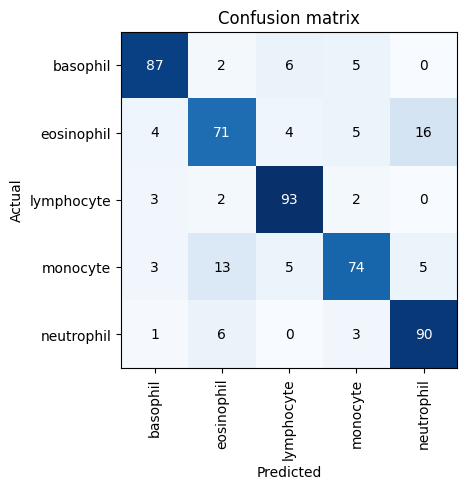

In [ ]:
interp.plot_confusion_matrix()

In [ ]:
interp.print_classification_report()

              precision    recall  f1-score   support

    basophil       0.89      0.87      0.88       100
  eosinophil       0.76      0.71      0.73       100
  lymphocyte       0.86      0.93      0.89       100
    monocyte       0.83      0.74      0.78       100
  neutrophil       0.81      0.90      0.85       100

    accuracy                           0.83       500
   macro avg       0.83      0.83      0.83       500
weighted avg       0.83      0.83      0.83       500



In [ ]:
# Specificity
cm = interp.confusion_matrix()


In [ ]:
confusion_df = pd.DataFrame(cm,
                         index=interp.vocab,
                         columns=interp.vocab)

FP = confusion_df.sum(axis=0) - np.diag(confusion_df)
FN = confusion_df.sum(axis=1) - np.diag(confusion_df)
TP = np.diag(confusion_df)
TN = confusion_df.values.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP)
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

print("Specificity (class-wise): ")
TNR

Specificity (class-wise): 


basophil      0.9725
eosinophil    0.9425
lymphocyte    0.9625
monocyte      0.9625
neutrophil    0.9475
dtype: float64

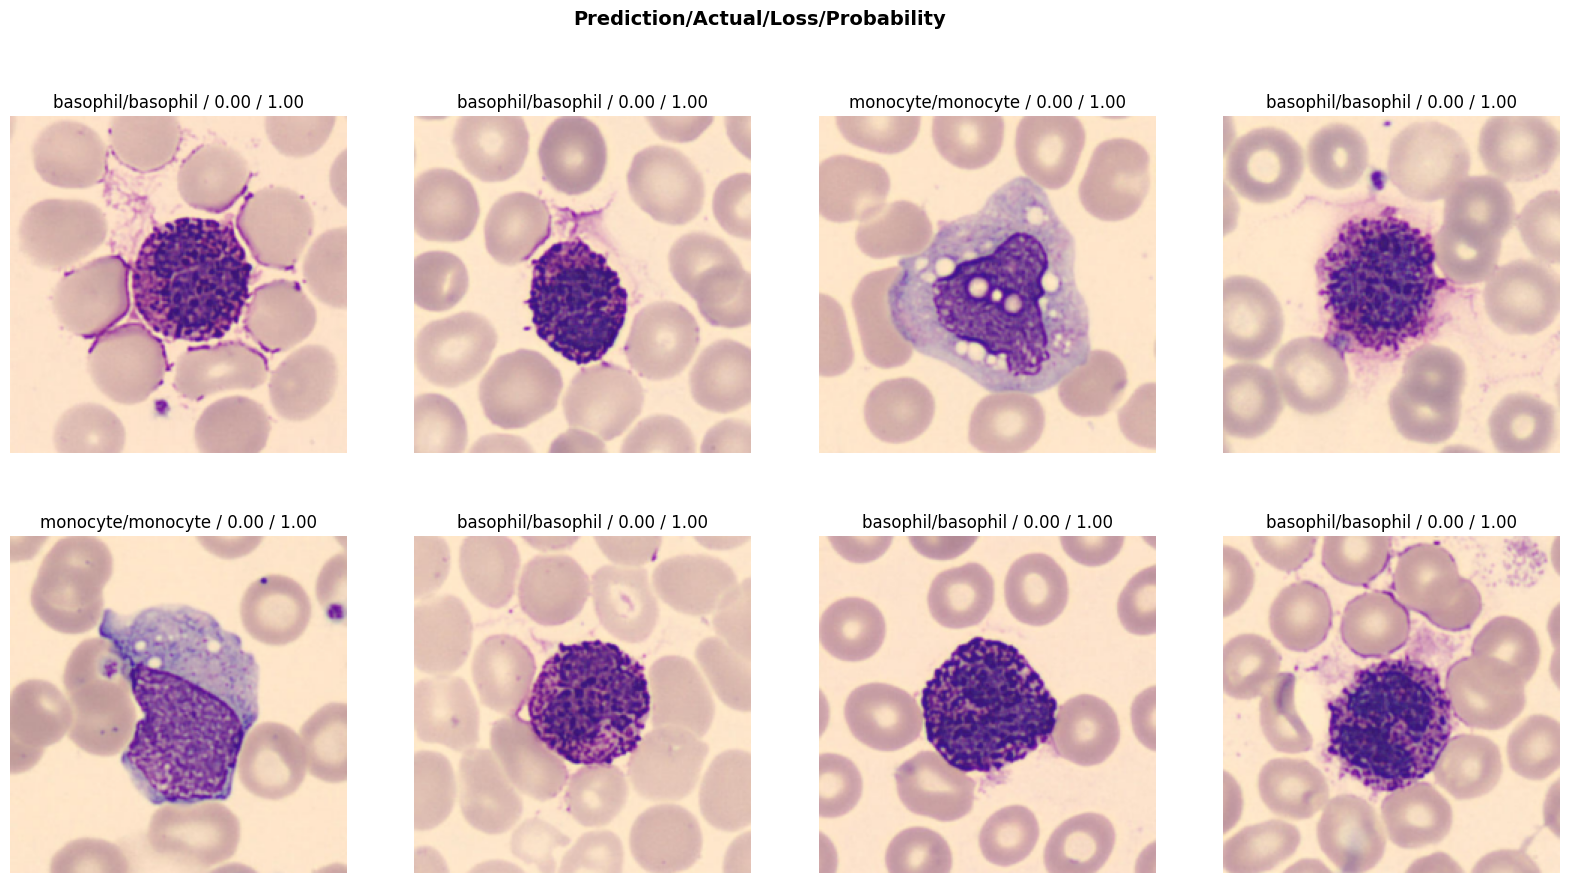

In [ ]:
interp.plot_top_losses(8, largest=False, figsize=(20,10)) # Best

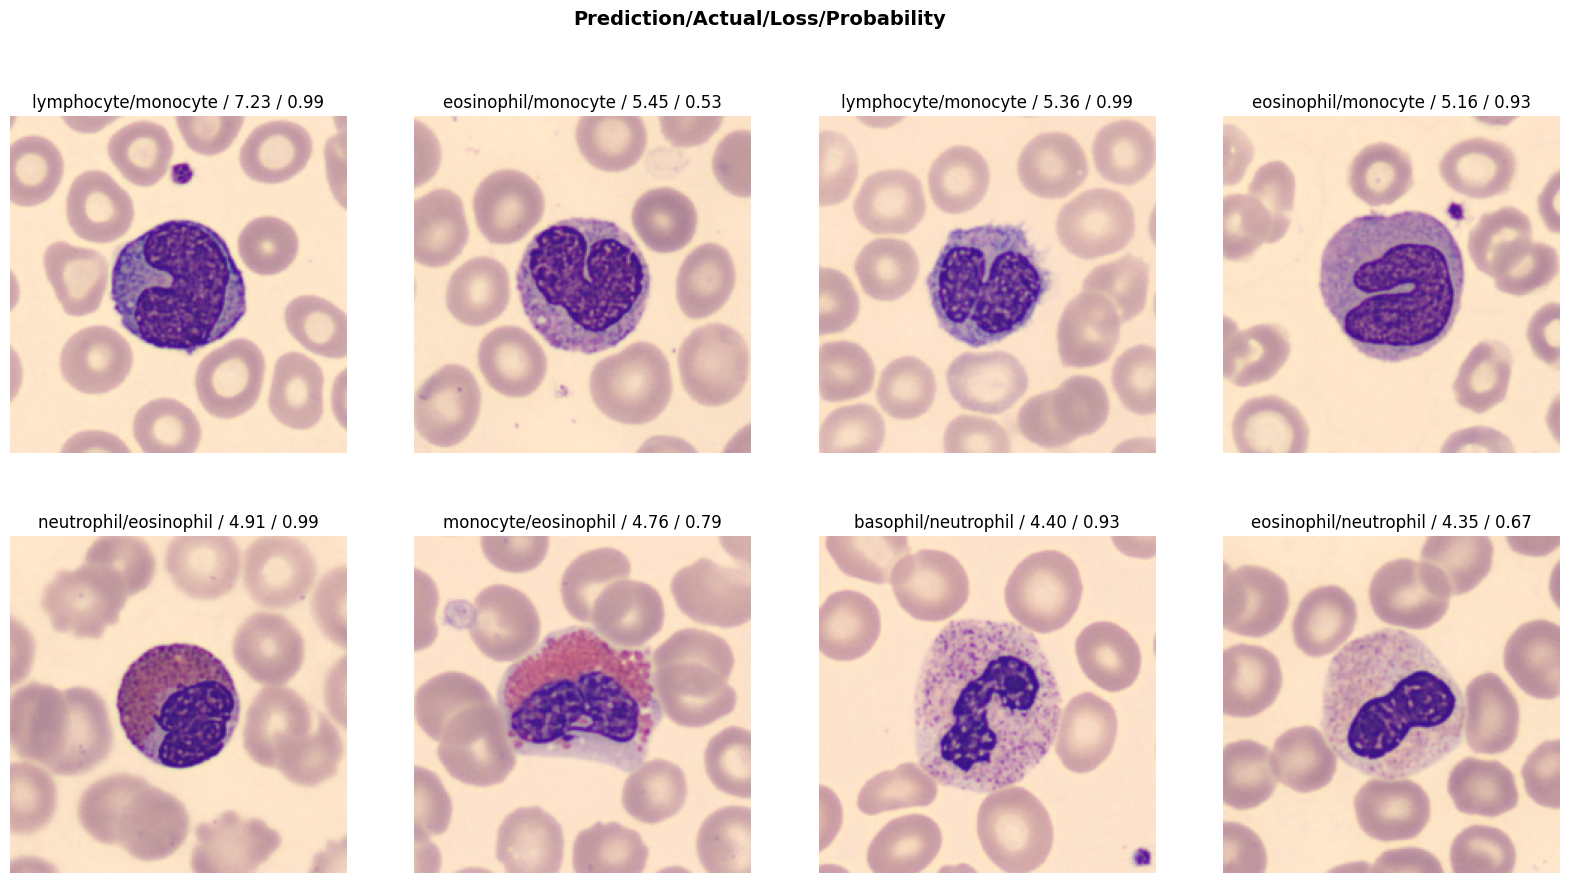

In [ ]:
interp.plot_top_losses(8, largest=True, figsize=(20,10)) # Worst

Answer the interpretation of results of Question 7 here:















<strong><font color=#ff0000>Question 8 (2 pt):</font></strong>

<strong><font color=#ff0000>Create a new code, modifying the partition percentage of the original set and the number of training epochs until obtaining the best possible classification results, with particular attention to the true positive rate TPR for each class. Analyze the results obtained.</font></strong>

By changing the metrics used for specifying the best results to Recall we should be able to nudge the CNN in a direction of higher TPR.











train_df  |test_df   |val_df    |df        
|||
937       |625       |938       |2500      
37.48%    |25.00%    |37.52%    |100.00%   


/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


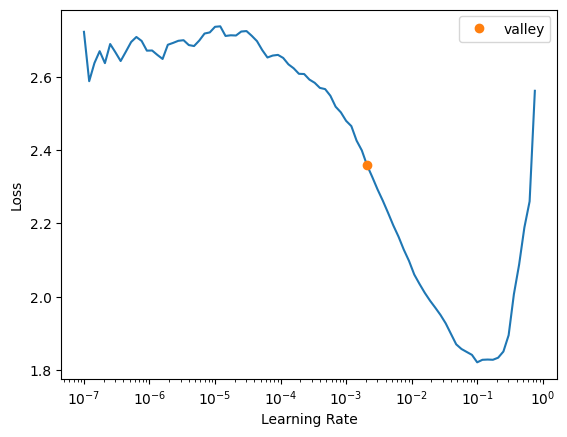

In [ ]:
# Preparation
training_data_2, test_df_2 = train_test_split(df, test_size= 0.25, random_state= 42, stratify= df['label'])
train_df_2, val_df_2 = train_test_split(training_data_2, test_size= 0.5, random_state= 42, stratify= training_data_2['label'])
train_df_2['set']='train_set'
val_df_2['set']='val_set'
test_df_2['set']='test_set'
df_2 = pd.concat([train_df_2, val_df_2, test_df_2], ignore_index=True, sort=False)

print(f"{'train_df':10}|{'test_df':10}|{'val_df':10}|{'df':10}")
print(""*10, "|", ""*10, "|", ""*10, "|", ""*10, sep="")
print(f"{len(train_df_2):<10}|{len(test_df_2):<10}|{len(val_df_2):<10}|{len(df_2):<10}")
print(f"{len(train_df_2)/len(df_2):<10.2%}|{len(test_df_2)/len(df_2):<10.2%}|", end="")
print(f"{len(val_df_2)/len(df_2):<10.2%}|{len(df_2)/len(df_2):<10.2%}")

batch_size = 64

data_2 = ImageDataLoaders.from_df(
    df_2,
    path="/",
    item_tfms=Resize(224),
    batch_tfms=[*aug_transforms(), Normalize.from_stats(*imagenet_stats)],
    bs=batch_size,
)

recall = Recall(average="micro")
# Automatically find the best learning rate.
learn_2 = cnn_learner(data_2, vgg16, metrics=recall, cbs=Recorder)
learning_rate = learn_2.lr_find()
suggested_learning_rate = learning_rate.valley

epoch,train_loss,valid_loss,recall_score,time
0,1.205590,0.581020,0.778000,00:19
0,1.205590,0.581020,0.778000,00:19
1,0.889885,0.450961,0.848000,00:20
1,0.889885,0.450961,0.848000,00:20
2,0.734395,0.467700,0.846000,00:19
2,0.734395,0.467700,0.846000,00:19
3,0.621116,0.422607,0.856000,00:20
3,0.621116,0.422607,0.856000,00:20
4,0.577609,0.358183,0.876000,00:19
4,0.577609,0.358183,0.876000,00:19


No improvement since epoch 4: early stopping


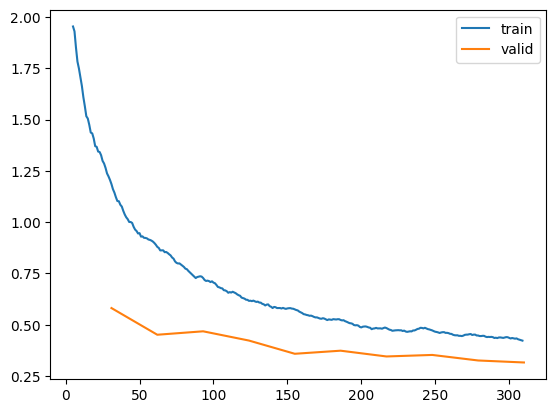

In [ ]:
# Learning
learn_2.fit(n_epoch=100,
            lr=suggested_learning_rate,
            cbs=[EarlyStoppingCallback(monitor='valid_loss',
                                       min_delta=0.01,
                                      patience=3),
                  EarlyStoppingCallback(monitor='recall_score',
                                                      min_delta=0.01,
                                                      comp=np.greater,
                                                      patience=5)]
            )
# Double callback to monitor both recall score and validation loss. No point continuing training if one of these are not changing
# Plot learning curve.
learn_2.recorder.plot_loss()

              precision    recall  f1-score   support

    basophil       0.94      0.97      0.95       125
  eosinophil       0.84      0.87      0.85       125
  lymphocyte       0.96      1.00      0.98       125
    monocyte       0.94      0.88      0.91       125
  neutrophil       0.91      0.86      0.89       125

    accuracy                           0.92       625
   macro avg       0.92      0.92      0.92       625
weighted avg       0.92      0.92      0.92       625



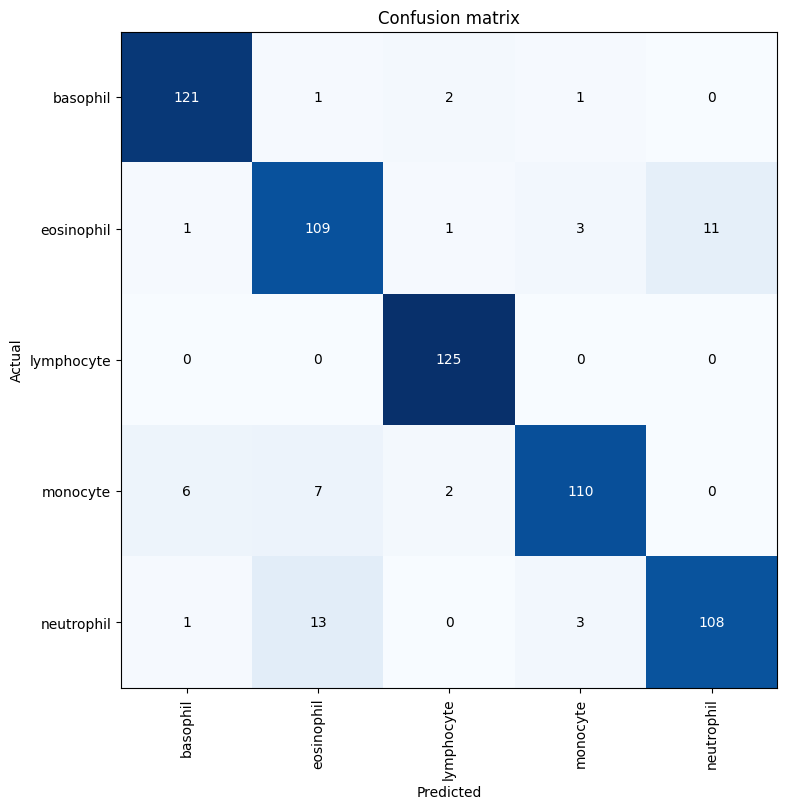

In [ ]:
# Evaluation.
test_dl_2 = learn_2.dls.test_dl(test_df_2, with_labels=True)
interp_2 = ClassificationInterpretation.from_learner(learn_2, dl=test_dl_2)

interp_2.plot_confusion_matrix(
    figsize=(8, 8),
    normalize=False,
    norm_dec=2,
    cmap="Blues",
    title="Confusion matrix"
)

interp_2.print_classification_report()

In [ ]:
from tabulate import tabulate
confusion_df = pd.DataFrame(interp_2.confusion_matrix(),
                         index=interp.vocab,
                         columns=interp.vocab)

FP = confusion_df.sum(axis=0) - np.diag(confusion_df)
FN = confusion_df.sum(axis=1) - np.diag(confusion_df)
TP = np.diag(confusion_df)
TN = confusion_df.values.sum() - (FP + FN + TP)


print("FP: \n", FP, "\n FN: \n",FN, "\n TP: \n",TP, "\n TN: \n", TN)

FP: 
 basophil       8
eosinophil    21
lymphocyte     5
monocyte       7
neutrophil    11
dtype: int64 
 FN: 
 basophil       4
eosinophil    16
lymphocyte     0
monocyte      15
neutrophil    17
dtype: int64 
 TP: 
 [121 109 125 110 108] 
 TN: 
 basophil      492
eosinophil    479
lymphocyte    495
monocyte      493
neutrophil    489
dtype: int64



From the Loss-plot we see that we used near optimal number of epochs,
Since we are looking for a high TPR we used the Recall as the metric.

In medical cases we have to have a good understanding of the problem at hand.
Sometimes it is beneficial to have a low False Positive rate
  - in cases where a surgery might be very dangerous, and you have to be absolutely sure before performing it,
other times it is beneficial to have a low False Negative rate
  - in cases where it is important to know wether or not a crucial medicine should be taken (e.g. alzheimers)

In any case a high TPR and TNR is beneficial because this means that you are accurately predicting the results.


One thing that should be looked into is how the model is performing at predicting the non-dangerous bacteria vs. the very dangerous bacteria,
because predicting that a bacteria is non-dangerous when it is actually super toxic might be very risky.


By recommendation from Marius Schnellbecher we used the 'lr_find' to find an optimal learning rate for the models learning rate, i also added callbacks to monitor
the losses and the recall score between each epoch in order to stop training at the optimal time.



> Nicolai Aleksander Olsen


> Emil Kousgard




